## **Project:** Do Locations of Fastfood Chain outlets Demarcate Areas by Socioeconomic Status?


There is an urban truism that fastfood chain outlets are a phenomena of low to middle income population groups or localities. For example the notion that the within the perimeter of where Red Rooster stores are located and spread is said to demarcate 'Western Sydney' from the 'rest' of Sydney, i.e. the lower socioeconomic status localities from the higher. A Sydney metropolitan newspaper even writes about a 'latte line', i.e. a virtual border that splits Sydney down class and economic lines running from the airport north-west through Parramatta (Sydney Morning Heralld, 28 March 2018, [LINK](https://www.smh.com.au/national/nsw/sydney-s-latte-line-exposes-a-city-divided-20180327-p4z6et.html)).

![Alt text](Latte_Line_map.png)


This project seeks to examine this general proposition about fastfood chain outlets by looking at several datasets pertaining to McDonalds Family Restaurants across Australia and where they are located by postcode, by Local Government Authority, and by metrics of socioeconomic disadvantage/advantage. 

The interest in Mcdonalds stem from my anecdotal observation that 11 such outlets currently operate from the suburb of Liverpool 2170, a locality situated in the Western Sydney heartland and known for its working class background, its ethnic diversity (especially of recent humanitarian entrants), the challenges it faces around employment, and thereby the low socioeconomic status (SES) ascribed to it. Furthermore, there are 849 outlets Australia-wide and across 560 postcode localities, compared to the lower figure of 348 outlets for Red Rooster, which Mcdonalds therefore provide a better-sized dataset to work with.

Data relating to Mcdonalds outlets were obtained from the online Yellow Pages. And, the data relating to socioeconomic disadvantage/advantage were obtained from the 2016 ABS Census' Socioeconomic Indexes For Areas (SEIFA), in particular the Index for Relative SocioEconomic Advantage and Disadvantage (IRSAD) - which posits a percentile or decile score against the area under observation (in this project's case, Postcode area or Local Government Authority area) from a 'Most Disadvantaged' to 'Most Advantaged' status.




## Technical Notebook: 

The following Jupyter notebook documents the code and process undertaken to explore the above question and to arrive at the conclusion stated below.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# % matplotlib inline   
#        --> NBJupyter notebooks now display plots inline by default, especially with modern versions of matplotlib and IPython.

In [2]:
import os
print(os.getcwd())

/workspaces/MaccasAUS


## Loading the dataset: 'McDonalds_AUS.csv'

**McD_Pc:** Postcodes wherein a McDonalds outlet is located.

**McD_Count:** the number of McDonalds outlets in the postcode locality.

**IRSAD_Pc_Decile:** the IRSAD score of the stated postcode, as deciles, per ABS Census 2016, SEIFA.

**IRSAD_Pc_Prcntl:** the IRSAD score of the stated postcode, as percentiles, per ABS Census 2016, SEIFA.

**Pop_Pc:** Population of the postcode locality, per ABS Census 2016.

**Peo_per_McD:** Ratio of McDonalds outlets in the postcode locality to the population there.

**1000_per_McD:** Ratio of McDonalds outlets in the postcode locality to the population there in the 1000s.

**McD-LGA:** The Local Government Authority area in which the McDonalds outlet is located.


In [3]:
McD_AU = pd.read_csv('./McDonalds_AUS.csv', sep = ',')
McD_AU

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA
0,2170,11,4.0,34.0,105451.0,9586.0,9.6,Liverpool
1,2000,8,9.0,85.0,27411.0,3426.0,3.4,Sydney
2,4870,6,5.0,42.0,71009.0,11835.0,11.8,Tablelands
3,2250,6,6.0,58.0,67194.0,11199.0,11.2,Wyong
4,2148,6,5.0,45.0,63071.0,10512.0,10.5,Holroyd
...,...,...,...,...,...,...,...,...
554,4010,1,9.0,90.0,2296.0,2296.0,2.3,Brisbane
555,2900,1,9.0,85.0,1930.0,1930.0,1.9,Queanbeyan
556,4106,1,4.0,31.0,1595.0,1595.0,1.6,Brisbane
557,2302,1,7.0,65.0,564.0,564.0,0.6,Newcastle


In [4]:
# McD_AU.rename(columns={'McD_LGA':'LGA'}, inplace=True)

In [5]:
McD_AU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   McD_Pc           559 non-null    int64  
 1   McD_Count        559 non-null    int64  
 2   IRSAD_Pc_Decile  558 non-null    float64
 3   IRSAD_Pc_Prcntl  558 non-null    float64
 4   Pop_Pc           558 non-null    float64
 5   Peo_per_McD      558 non-null    float64
 6   1000_per_McD     558 non-null    float64
 7   McD_LGA          559 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 35.1+ KB


## Detecting Null values in the dataset

In [6]:
McD_AU[McD_AU.IRSAD_Pc_Decile.isnull()]

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA
175,5950,1,NaN,NaN,NaN,NaN,NaN,West Torrens


In [7]:
McD_AU.drop([175], axis = 0, inplace=True)

**Confirming Null records removed . . .**

In [8]:
McD_AU[McD_AU.IRSAD_Pc_Decile.isnull()]

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA


In [9]:
McD_AU.shape

(558, 8)

## Changing the names of columns

That is for better ease and consistency of understanding what they represent, ahead of manipulating them.


In [10]:
McD_AU.rename(columns={'Pcode_Counted':'McD_Pc', 'Pcode_Count':'McD_Count', 
                       'Pop_PC':'Pop_Pc', 'IRSAD_dec_Pc':'IRSAD_Pc_Decile', 
                       'IRSAD_per_Pc':'IRSAD_Pc_Prcntl', 
                       'LGA':'McD_LGA'})
McD_AU.head()

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA
0,2170,11,4.0,34.0,105451.0,9586.0,9.6,Liverpool
1,2000,8,9.0,85.0,27411.0,3426.0,3.4,Sydney
2,4870,6,5.0,42.0,71009.0,11835.0,11.8,Tablelands
3,2250,6,6.0,58.0,67194.0,11199.0,11.2,Wyong
4,2148,6,5.0,45.0,63071.0,10512.0,10.5,Holroyd


In [11]:
McD_AU.rename(columns={'McD_LGA':'LGA'}, inplace=True)
McD_AU.head()

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,LGA
0,2170,11,4.0,34.0,105451.0,9586.0,9.6,Liverpool
1,2000,8,9.0,85.0,27411.0,3426.0,3.4,Sydney
2,4870,6,5.0,42.0,71009.0,11835.0,11.8,Tablelands
3,2250,6,6.0,58.0,67194.0,11199.0,11.2,Wyong
4,2148,6,5.0,45.0,63071.0,10512.0,10.5,Holroyd


## . . . and checking the general dataframe characteristics and datatypes

In [12]:
McD_AU.describe(include = 'all')

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,LGA
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brisbane
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
mean,3677.120072,1.519713,5.767025,53.189964,24074.512545,17527.580645,17.527778,NaN
std,1385.445391,1.021566,3.007983,29.987067,16345.465276,10757.146691,10.759182,NaN
min,800.000000,1.000000,1.000000,1.000000,73.000000,37.000000,0.000000,NaN
25%,2531.500000,1.000000,3.000000,26.000000,12784.500000,10396.750000,10.400000,NaN
50%,3200.000000,1.000000,6.000000,55.000000,19771.500000,15262.000000,15.300000,NaN
75%,4557.750000,2.000000,9.000000,81.000000,31638.250000,22994.000000,23.025000,NaN


In [13]:
McD_AU.dtypes

McD_Pc               int64
McD_Count            int64
IRSAD_Pc_Decile    float64
IRSAD_Pc_Prcntl    float64
Pop_Pc             float64
Peo_per_McD        float64
1000_per_McD       float64
LGA                 object
dtype: object

## Examining the distribution of localities hosting MacDonald outlets by their IRSAD score


Text(0.5, 1.0, 'Distribution of Localities across AU hosting MacDonald outlets by their IRSAD score (ABS Census 2016, SEIFA)')

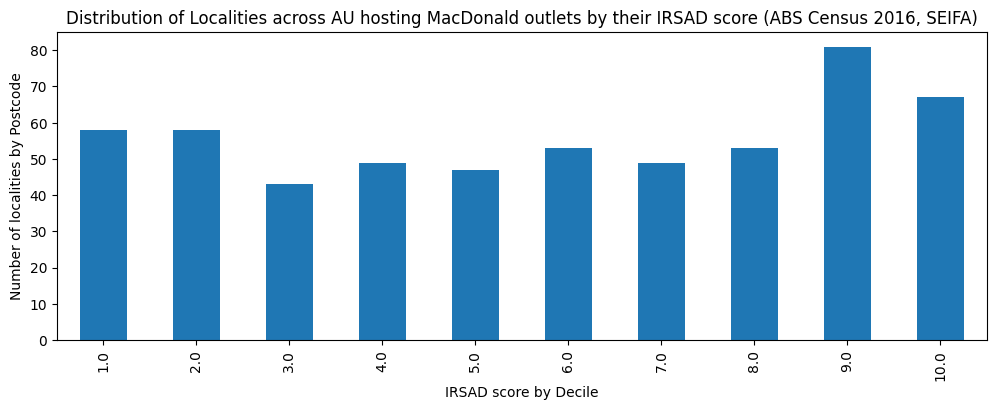

In [14]:
McD_AU.IRSAD_Pc_Decile.value_counts().sort_index().plot(kind='bar', figsize=(12,4));
plt.xlabel('IRSAD score by Decile');
plt.ylabel('Number of localities by Postcode')
plt.title('Distribution of Localities across AU hosting MacDonald outlets by their IRSAD score (ABS Census 2016, SEIFA)')

## Exploring the number of McDonald outlets in any given locality.

The majority, expectedly, of localities hosted only one McDonalds outlet, with roughly 10% hosting two or more. The noteable case of eleven outlets was in Liverpool 2170.

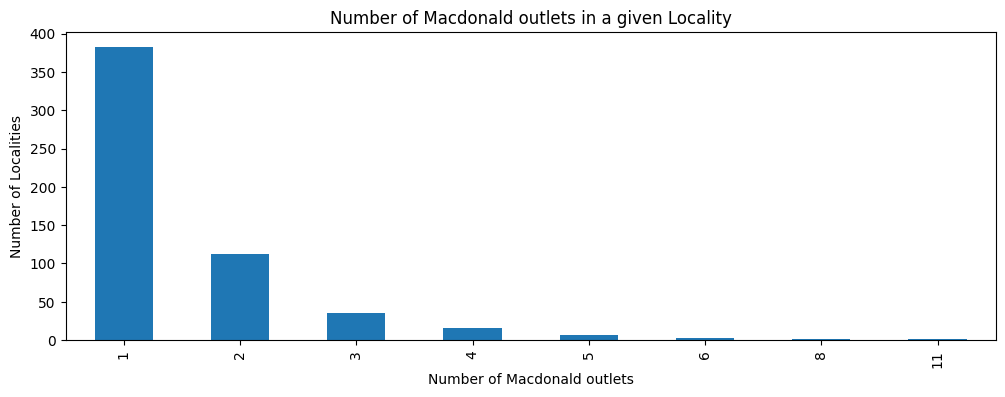

In [15]:
McD_AU.McD_Count.value_counts().sort_index().plot(kind='bar', figsize=(12,4));
plt.xlabel('Number of Macdonald outlets');
plt.ylabel('Number of Localities')
plt.title('Number of Macdonald outlets in a given Locality');

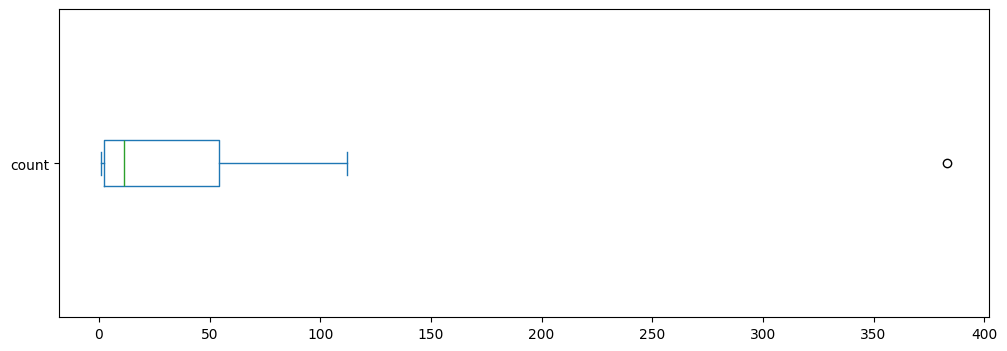

In [16]:
McD_AU.McD_Count.value_counts().sort_index().plot(kind='box', vert = False, figsize=(12,4));

In [17]:
# NSWcrime.groupby('IER_Decile').Assault_Dom.value_counts()
McD_AU.groupby('IRSAD_Pc_Decile').McD_Count.sum()

IRSAD_Pc_Decile
1.0      78
2.0      84
3.0      60
4.0      90
5.0      88
6.0      92
7.0      70
8.0      75
9.0     129
10.0     82
Name: McD_Count, dtype: int64

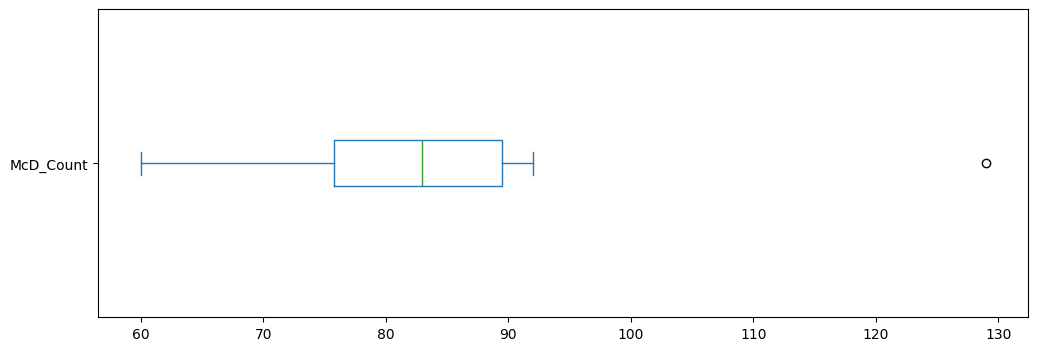

In [18]:
McD_AU.groupby('IRSAD_Pc_Decile').McD_Count.sum().plot(kind='box', vert = False, figsize=(12,4));

## Examining the frequency distribution of McDonald outlets by IRSAD scores.

Percentile depictions show too granular a pattern, compared to the Decile depiction. In the latter suggests a strong presence of Mcdonalds outlets in both lower and middle socioeconomic status localities, and interestingly a ver pronounced preence in the higher socioeconomic status localities.

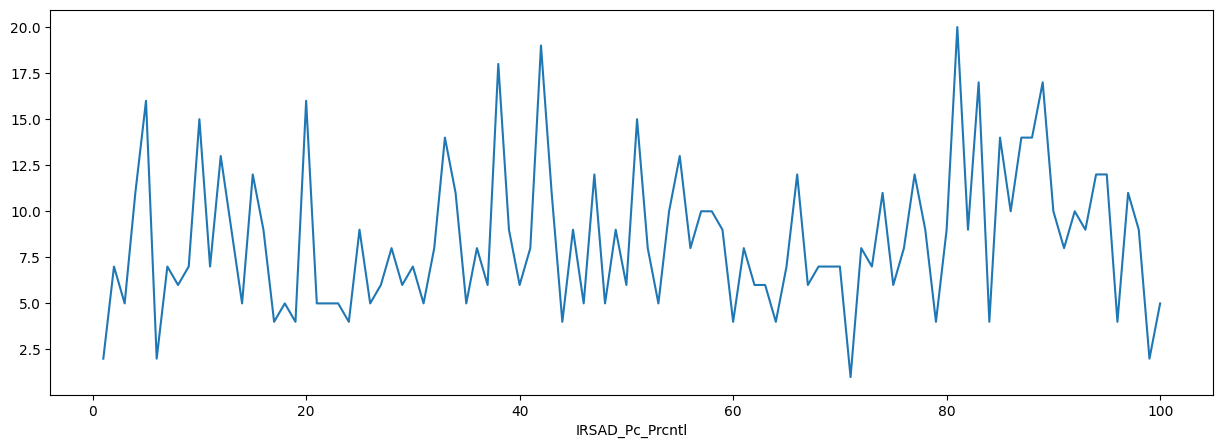

In [19]:
McD_AU.groupby('IRSAD_Pc_Prcntl').McD_Count.sum().plot(kind = 'line', figsize = (15, 5));

<Axes: xlabel='IRSAD_Pc_Decile'>

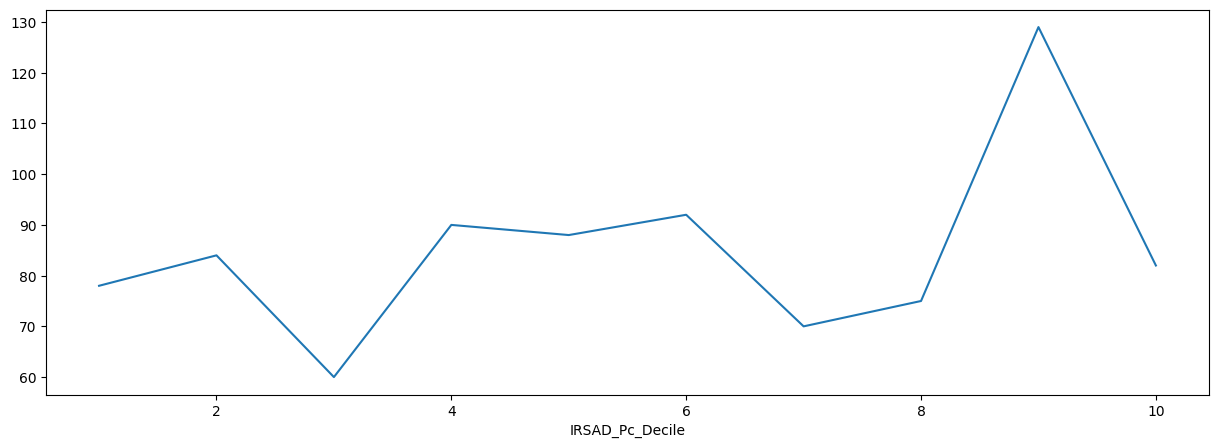

In [20]:
McD_AU.groupby('IRSAD_Pc_Decile').McD_Count.sum().plot(kind = 'line', figsize = (15, 5))

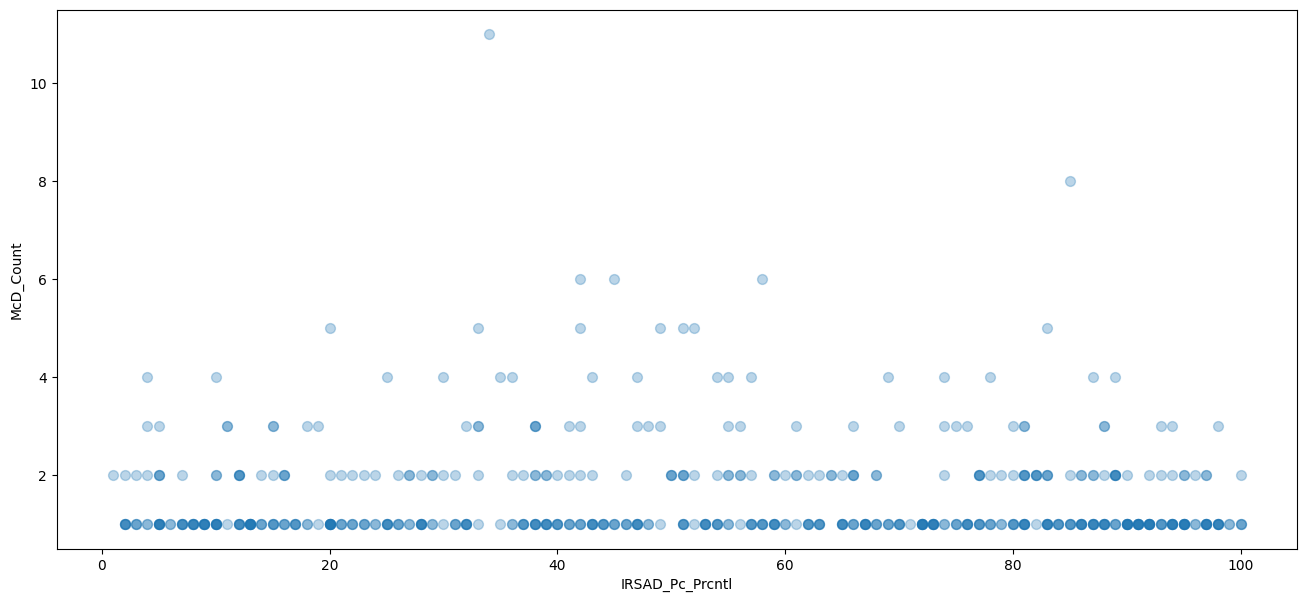

In [21]:
McD_AU.plot(kind = 'scatter', x = 'IRSAD_Pc_Prcntl', y = 'McD_Count', figsize=(16,7), s=50, alpha=.3);

## Examining the effect of adjusting for the 'population' to 'outlets' ratio in a postcode locality.

A scatterplot of Population-to-Outlets ratio versus the IRSAD scores displayed no discernible pattern of association.


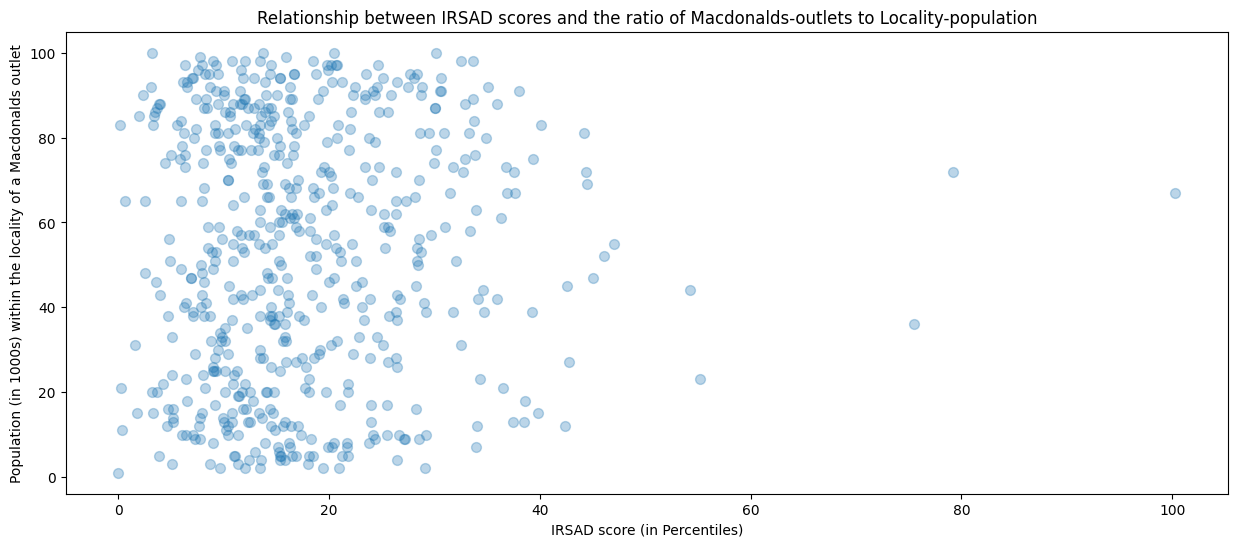

In [22]:
McD_AU.plot(kind = 'scatter', x = '1000_per_McD', y = 'IRSAD_Pc_Prcntl', 
            figsize = (15,6), alpha=0.3, s=50,
            title= 'Relationship between IRSAD scores and the ratio of Macdonalds-outlets to Locality-population')
plt.ylabel('Population (in 1000s) within the locality of a Macdonalds outlet')
plt.xlabel('IRSAD score (in Percentiles)');
# plt.savefig('IRSAD_scores_by_MaccasOutlet1.png'); 

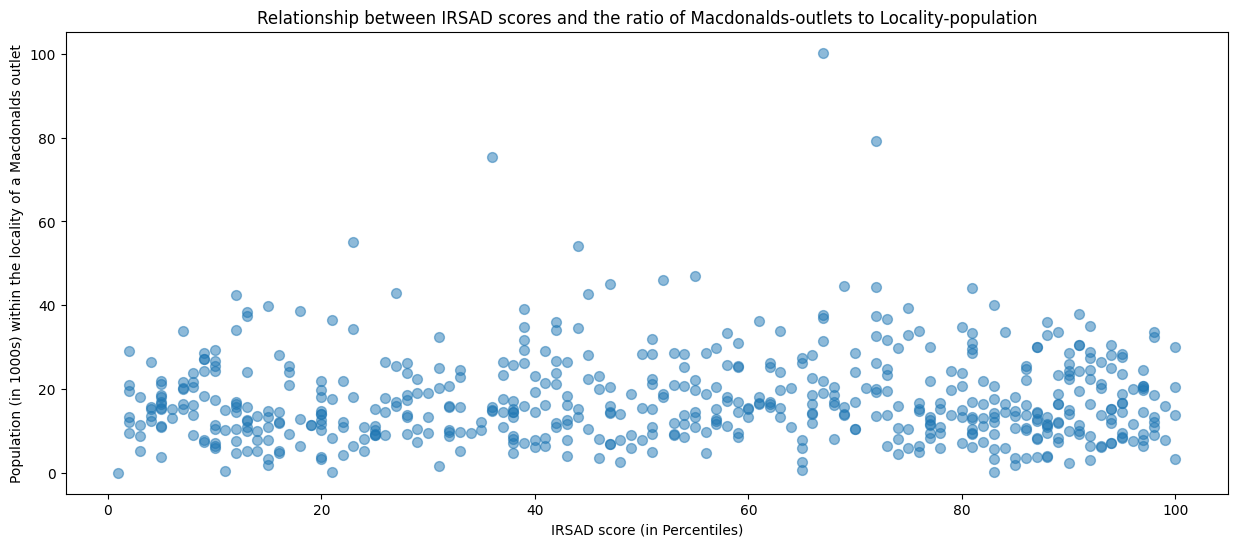

In [23]:
McD_AU.plot(kind = 'scatter', x = 'IRSAD_Pc_Prcntl', y = '1000_per_McD', 
            figsize =(15,6), alpha=0.5, s=50,
            title= 'Relationship between IRSAD scores and the ratio of Macdonalds-outlets to Locality-population');
plt.ylabel('Population (in 1000s) within the locality of a Macdonalds outlet')
plt.xlabel('IRSAD score (in Percentiles)');
# plt.savefig('IRSAD_scores_by_MaccasOutlet2.png'); 

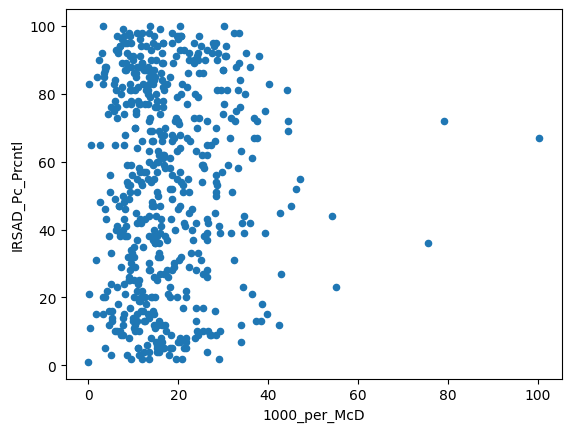

In [24]:
McD_AU[['1000_per_McD', 'IRSAD_Pc_Prcntl']].plot(kind = 'scatter', x = '1000_per_McD', y = 'IRSAD_Pc_Prcntl');

## Creating a new dataframe that represents the number of McDonalds outlets in an LGA, and the corresponding IRSAD score of that LGA.


In [25]:
McD_in_LGA = McD_AU.groupby('LGA').McD_Count.sum()
McD_in_LGA

LGA
ACT                 6
Albury              2
Ballarat            1
Bankstown           2
Bass Coast          2
                   ..
Yarrabah            1
Yass Valley        13
York                2
Yorke Peninsula     1
Young               2
Name: McD_Count, Length: 193, dtype: int64

In [26]:
LGA_IRSAD = McD_AU.groupby('LGA').IRSAD_Pc_Prcntl.mean()
LGA_IRSAD

LGA
ACT                92.000000
Albury             27.000000
Ballarat            6.000000
Bankstown          43.500000
Bass Coast         21.000000
                     ...    
Yarrabah           38.000000
Yass Valley        65.666667
York               33.500000
Yorke Peninsula    13.000000
Young              16.000000
Name: IRSAD_Pc_Prcntl, Length: 193, dtype: float64

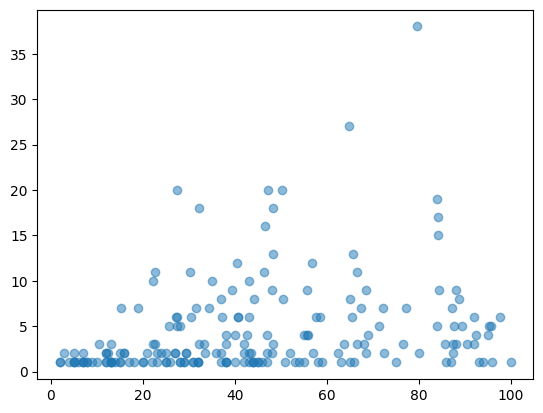

In [27]:
plt.scatter(LGA_IRSAD, McD_in_LGA, alpha=0.5)
plt.show()

**The new dataframe . . .**

In [28]:
LGA_IRSAD_McD = pd.DataFrame(
    {'IRSAD_score': LGA_IRSAD,
     'Number_McD': McD_in_LGA,
    })
LGA_IRSAD_McD.head(65)

,IRSAD_score,Number_McD
LGA,,
ACT,92.000000,6
Albury,27.000000,2
Ballarat,6.000000,1
Bankstown,43.500000,2
Bass Coast,21.000000,2
...,...,...
Leichhardt,93.000000,1
Liverpool,27.428571,20
Logan,46.600000,16


## Visualising the relationship between the above factors.


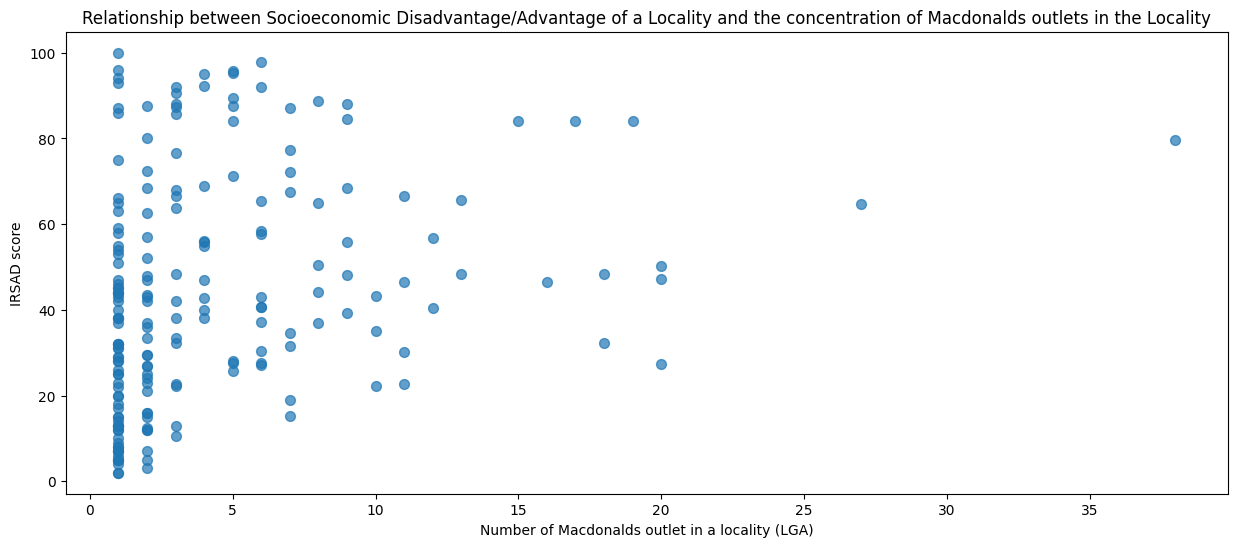

In [29]:
LGA_IRSAD_McD.plot(kind = 'scatter', x = 'Number_McD', y = 'IRSAD_score', 
                   figsize =(15,6), alpha=0.7, s=50,
            title = 'Relationship between Socioeconomic Disadvantage/Advantage of a Locality and the concentration of Macdonalds outlets in the Locality');
plt.xlabel('Number of Macdonalds outlet in a locality (LGA)')
plt.ylabel('IRSAD score');
# plt.savefig('IRSAD_scores_by_MaccasOutlet.png'); 

**The same data transformed, . . .**


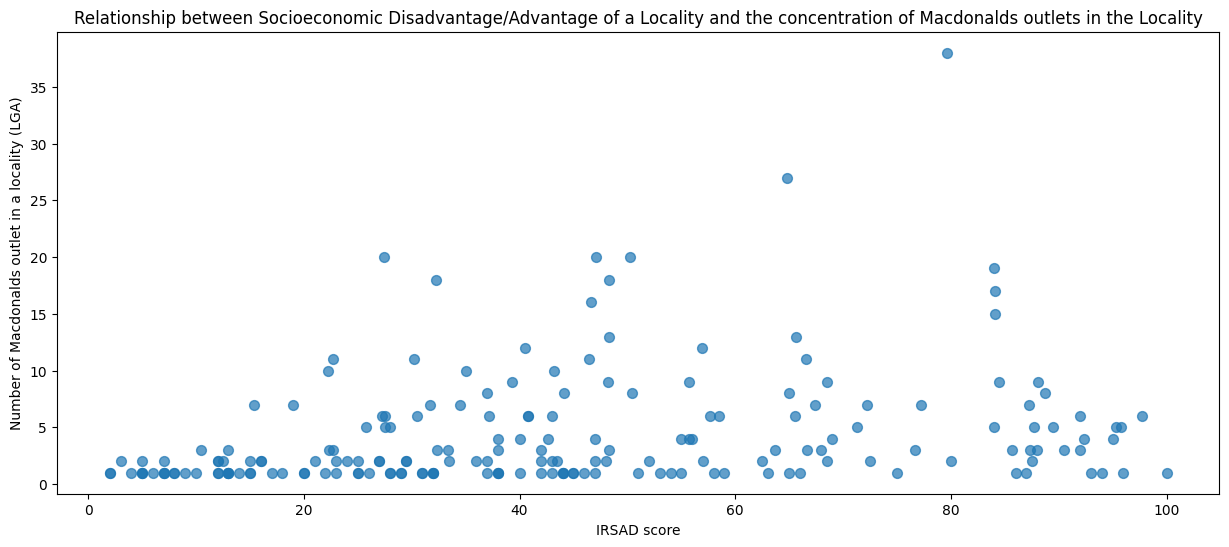

In [30]:
LGA_IRSAD_McD.plot(kind = 'scatter', y = 'Number_McD', x = 'IRSAD_score', 
                   figsize =(15,6), alpha=0.7, s=50,
            title = 'Relationship between Socioeconomic Disadvantage/Advantage of a Locality and the concentration of Macdonalds outlets in the Locality');
plt.ylabel('Number of Macdonalds outlet in a locality (LGA)')
plt.xlabel('IRSAD score');

## Measuring the degree of relationship of the those same factors.


In [31]:
LGA_IRSAD_McD.corr().style.background_gradient()

,IRSAD_score,Number_McD
IRSAD_score,1.000000,0.265545
Number_McD,0.265545,1.000000


## Exploring possible other correlations in the factors presenting in the main dataframe.


Moreover, the strongest meaningful correlation, which at 0.53 was still a weak one, showed to be the relationship between the population of the locality and the number of outlets in that locality - which is arguably a factor of simple business imperative (of being situated in high population locations) more than anything else.

In [32]:
# titanic.corr().style.background_gradient()
McD_AU.select_dtypes(include='number').corr().style.background_gradient()
#                    ^ NB the .corr method requires crosstabs of numbers only, whilst the McD_AU df contains 1x string col re LGA names

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD
McD_Pc,1.000000,-0.094901,-0.141088,-0.149023,-0.052138,-0.012341,-0.012345
McD_Count,-0.094901,1.000000,-0.024210,-0.027023,0.529613,-0.233587,-0.233507
IRSAD_Pc_Decile,-0.141088,-0.024210,1.000000,0.995442,0.004539,0.054214,0.054177
IRSAD_Pc_Prcntl,-0.149023,-0.027023,0.995442,1.000000,-0.000329,0.049467,0.049429
Pop_Pc,-0.052138,0.529613,0.004539,-0.000329,1.000000,0.613789,0.613813
Peo_per_McD,-0.012341,-0.233587,0.054214,0.049467,0.613789,1.000000,0.999996
1000_per_McD,-0.012345,-0.233507,0.054177,0.049429,0.613813,0.999996,1.000000



## Summary and findings from the Technical Notebook 

A prexeisting datafile in excel contained information on the 559 Mcdonalds outlets across Australia indicating their location and numbers by postcode, and the corresponding Local Government Authority (LGA) it was located in, its corresponding IRSAD score by postcode, and corresponding population by postcode. Minimal 'cleaning' of the dataset was required. 

Preliminary exploration of this dataset looked at the number or frequency of Macdonald outlets in any given Locality, considering that it is not uncommon that multiple outlets operate in one postcode locality - the highest number in anyone postcode being in Liverpool 2170, as already mentioned above. 

The distribution of localities hosting Macdonald outlets by their IRSAD score was also part of the preliminary examination. Already, it appeared that the proposition that 'fastfood chain outlets are a phenomena of low to middle income population groups or localities' was not holding too firmly: Indeed, variability of outlets by locality or by socioeconomic measure was not clearly discernible. Indeed, the remarkable observation of Liverpool 2170 exhibiting 11 outlets showed it to be an outlier, against the equally remarkable result of many high SES localities, i.e. in the top 9th and 10th percentiles, showing multiple Mcdonalds outlets operating there as well.

In the final analysis the correlation between the IRSAD score of a locality, at the LGA level (so as to aggregate postcode locations and numbers of Mcdonalds outlets) was undertaken. The result only showed a low postive correlation between the variables at the measure of 0.27. Thus, the urban truism that fastfood chain outlets, as far as Mcdonalds Family Restaurants go, are a phenomena of low to middle income population groups or localities (on the basis of the SEIFA measure of IRSAD), cannot be upheld.

- NB. *Moreover, the strongest correlation, which at 0.53 was still a weak one, showed to be the relationship between the population of the locality and the number of outlets in that locality - which is arguably a factor of simple business imperative (of being situated in high population locations) more than anything else.*
